In [1]:
#imports

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet

%matplotlib inline

In [6]:
# load the data
filename = 'All Raw Data.csv'
df = pd.read_csv('data/' + filename, index_col = 'Unnamed: 0')

# remove line 1 (not a float value)
df = df[1:]

In [11]:
df

,Fe,Ni,Cu,Zn,Zr,Ag,Ag.1,Cd,Cd.1,Sn,Sn.1,Sb,Sb.1,Pb,Pb.1,cluster
86W-8ES1-037-001_leadball-15mm_,18499,114,2012,802,3832,4466,1156,17941,0,3853,-1,-7,402,2381851,16607,21
17L-6568-001_leadball-13mm-spen,23268,160,2028,935,4416,4766,1365,18489,0,4352,0,3,1003,2395509,15105,22
17L-5743-006_leadball-12mm_spen,21923,106,3250,745,4439,4457,1330,17446,0,3539,0,-13,219,2349637,12089,23
16L-3746-001_leadball-13mm_40v_,9126,1,5793,1036,3793,3565,1201,12474,0,2597,0,-6,569,2064305,18470,25
16L-3431-003_leadball-14mm_40v_,14389,859,2897,1983,3755,4306,1332,14766,0,2904,0,-17,340,2204737,16333,27
17L-7021-001_leadball-8mm_40v_2,15521,184,2062,686,2728,2307,1453,6377,0,1492,0,9,325,1542362,9316,39
17L-7015-003_leadball-7mm_40v_2,8347,88,1904,784,2422,2033,1578,4872,0,1164,0,37,235,1340572,9490,45
17L-7011-001_leadball-8mm_40v_2,16836,221,2368,650,3619,2717,1612,7431,0,1478,0,30,148,1600922,9716,37
17L-7002-008_leadball-8mm_40v_2,11778,45,1846,487,2888,2494,1671,6288,0,1066,0,-2,646,1481688,10478,44
17L-7001-001_leadball-8mm_40v_2,20546,231,2142,718,3135,2677,1707,6985,0,1359,0,6,339,1580242,7854,38


Cophenetic Correlation Coefficient:0.8146956561493388


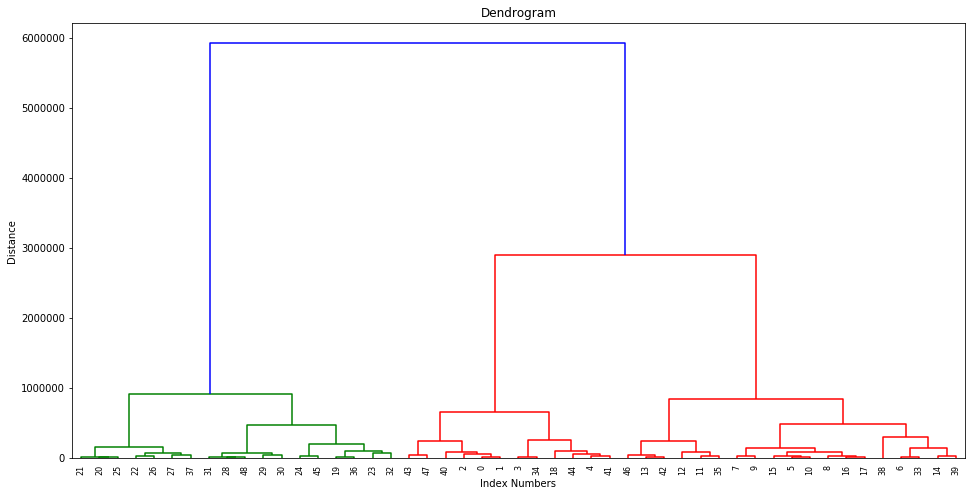

,Fe,Ni,Cu,Zn,Zr,Ag,Ag.1,Cd,Cd.1,Sn,Sn.1,Sb,Sb.1,Pb,Pb.1,cluster
86W-8ES1-037-001_leadball-15mm_,18499,114,2012,802,3832,4466,1156,17941,0,3853,-1,-7,402,2381851,16607,21
17L-6568-001_leadball-13mm-spen,23268,160,2028,935,4416,4766,1365,18489,0,4352,0,3,1003,2395509,15105,22
17L-5743-006_leadball-12mm_spen,21923,106,3250,745,4439,4457,1330,17446,0,3539,0,-13,219,2349637,12089,23
16L-3746-001_leadball-13mm_40v_,9126,1,5793,1036,3793,3565,1201,12474,0,2597,0,-6,569,2064305,18470,25
16L-3431-003_leadball-14mm_40v_,14389,859,2897,1983,3755,4306,1332,14766,0,2904,0,-17,340,2204737,16333,27
17L-7021-001_leadball-8mm_40v_2,15521,184,2062,686,2728,2307,1453,6377,0,1492,0,9,325,1542362,9316,39
17L-7015-003_leadball-7mm_40v_2,8347,88,1904,784,2422,2033,1578,4872,0,1164,0,37,235,1340572,9490,45
17L-7011-001_leadball-8mm_40v_2,16836,221,2368,650,3619,2717,1612,7431,0,1478,0,30,148,1600922,9716,37
17L-7002-008_leadball-8mm_40v_2,11778,45,1846,487,2888,2494,1671,6288,0,1066,0,-2,646,1481688,10478,44
17L-7001-001_leadball-8mm_40v_2,20546,231,2142,718,3135,2677,1707,6985,0,1359,0,6,339,1580242,7854,38


In [9]:
# Convert our data to a matrix to pass to the clustering algorithm:
X = df.values

# Implement the clustering algorithm using the ward method:
Z = linkage(X, 'ward')

# Calculate the cophenetic correlation coefficient to see how well the algorithm has measured the distances between the points:
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation Coefficient:' + str(c))

# now let's make our dendrogram
fig= plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.savefig('outputs/lead_clusters.png')
plt.show()


# we can see that no links exist above a distance of 200 - so we will set maximum distance at 200 and use the fclusters function from scipy.cluster.hierarchy, which will return our cluster ID's.

max_dist = 200 # pairwise distance

# Fcluster here
df['cluster'] = fcluster(Z, max_dist, criterion='distance')
df

In [10]:
df.to_csv('outputs/lead_clusters.csv', index=False)